## Simple Linear Regression

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
## Reading the dataset
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

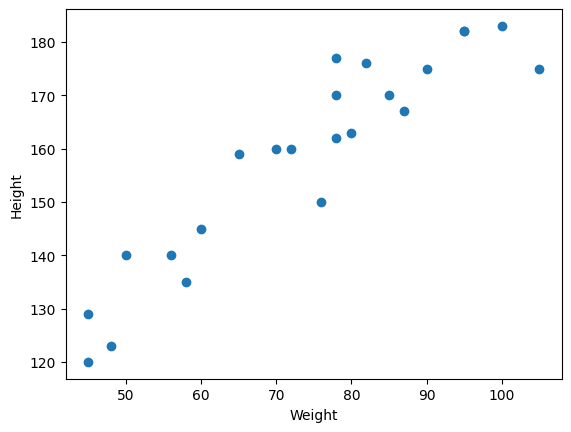

In [38]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [39]:
# divide out dataset into dependent and independent features
X = df[['Weight']] #independent feature
y = df['Height'] #dependent feature

In [40]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=42)

In [41]:
X.shape

(23, 1)

In [42]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

In [43]:
# Standardize the dataset Train data or independent data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [44]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [45]:
# Train the simple Linear regression model
from sklearn.linear_model import LinearRegression

In [46]:
regression = LinearRegression()

In [47]:
regression.fit(X_train,y_train)

LinearRegression()

In [49]:
print("The slope or the coefficient of weight is: ",regression.coef_)
print("Intercept: ",regression.intercept_)

The slope or the coefficient of weight is:  [0.9630459]
Intercept:  85.96709053063559


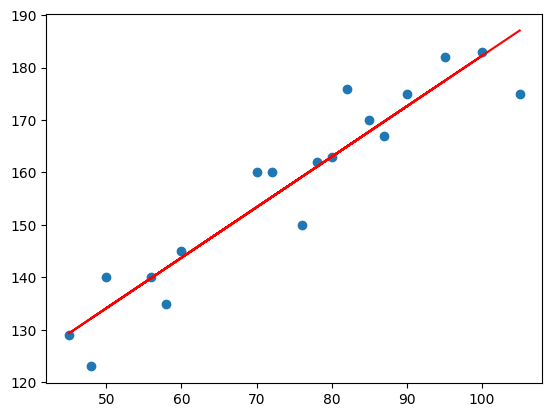

In [50]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'r')

# prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =85.96 + 0.963045(X_train)
# prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =85.96 + 0.963045(X_test)

In [52]:
y_pred = regression.predict(X_test)

In [54]:
y_pred,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

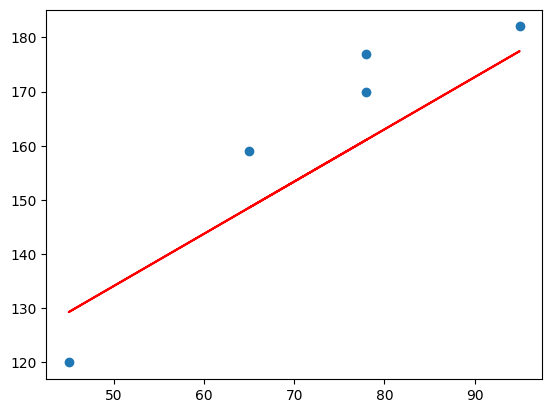

In [55]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test),'r')

## Performance Metrics

## MSE, MAE, RMSE
## R squared and adjusted R squared

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from sklearn.metrics import r2_score

In [58]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051658
9.822657814519232
10.477400726827078


## R square
Formula

**R^2 = 1 - SSR/SST**

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [59]:
score = r2_score(y_test,y_pred)

In [60]:
score

0.776986986042344

## Adjusted R Square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [61]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [62]:
regression

LinearRegression()

In [72]:
scaled_weight = scaler.transform([[80]])
scaled_weight

C:\Users\PCC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [73]:
scaled_weight[0]

array([0.32350772])

In [75]:
print("The height prediction for weight 80 kg is :",regression.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [86.27864331]


C:\Users\PCC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


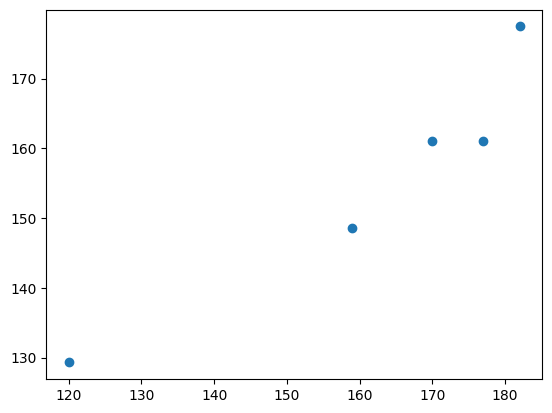

In [78]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred)

In [80]:
## Residuals
residuals=y_test-y_pred
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\PCC\AppData\Local\Temp\ipykernel_13560\3905197135.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

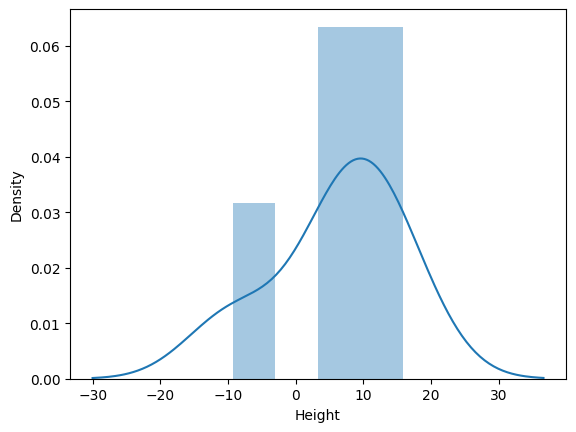

In [81]:
import seaborn as sns
sns.distplot(residuals,kde=True)

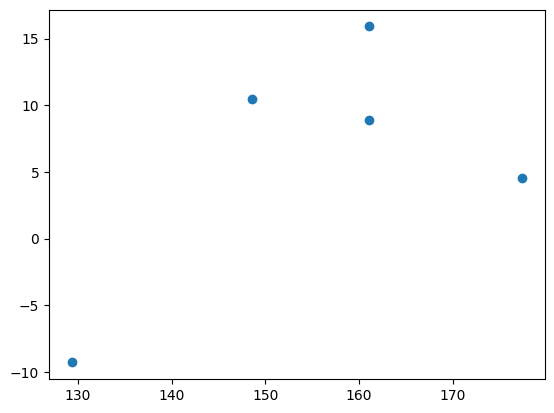

In [82]:
## scatter plot with respect to prediction and residual
## uniform distribution

plt.scatter(y_pred,residuals)